In [2]:
from numpy import genfromtxt
from numpy import *
import matplotlib
import csv
from scipy import sparse
%pylab
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn import decomposition
from sklearn import cluster


Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [3]:
description = genfromtxt('description.csv', delimiter=',')

In [4]:
graph  = genfromtxt('graph.csv', delimiter=',')

In [6]:
def count_num(arr, n):
    ans = 0
    for i in arr:
        if i == n:
            ans+=1
    return ans

In [10]:
count_num(graph[:,0],0)

32

In [11]:
L = graph
L.

In [5]:
social_evolution = genfromtxt('social_and_evolution.csv', delimiter=',')

In [6]:
m=1829
n=8000
X_dat=genfromtxt('description.csv',delimiter=',')
X_c=sparse.coo_matrix((m,n))
X_c.data=X_dat[:,2].astype(float64)
X_c.row=X_dat[:,0].astype(int32)
X_c.col=X_dat[:,1].astype(int32)
X=X_c.todense()

In [7]:
Y = X

In [5]:
pca = decomposition.PCA(n_components=6000)
pca.fit(X)
Y = pca.transform(X)
Y

array([[  3.11200427e-02,  -2.42024699e-02,   6.60912449e-02, ...,
         -7.11236625e-17,   2.48282297e-17,  -1.81061763e-17],
       [ -8.89236220e-02,   7.83313324e-02,  -2.04595857e-02, ...,
         -2.51534904e-17,  -3.79470760e-17,   8.23993651e-18],
       [ -9.67048955e-03,  -5.07912530e-02,  -3.97609067e-02, ...,
         -3.56702515e-17,  -1.88651178e-17,   2.56955915e-17],
       ..., 
       [  9.42979049e-02,  -1.13820180e-02,  -2.63772119e-02, ...,
         -5.35595873e-17,   5.80319213e-17,  -3.36644775e-17],
       [ -2.59484814e-02,  -6.04447599e-02,  -1.95046299e-02, ...,
         -7.54875763e-17,   1.55854062e-17,  -2.56955915e-17],
       [  7.84047116e-03,   5.35026010e-02,   9.14094741e-02, ...,
         -5.94142791e-17,  -8.89045781e-18,   2.47198095e-17]])

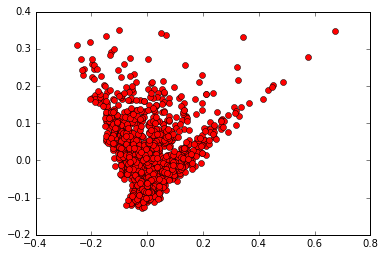

In [8]:
import matplotlib.pyplot as plt
plt.plot(Y[:,0], Y[:,1], 'ro')
plt.show()

In [9]:
k_means = cluster.KMeans(n_clusters=2)
k_means.fit(Y)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

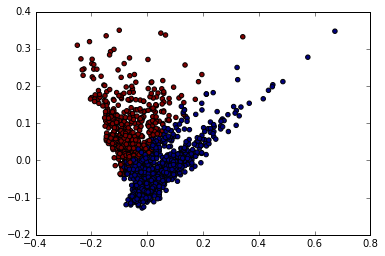

In [10]:
k_means.labels_
#col = np.choose(k_means.labels_, [1, 0]).astype(np.float)
plt.scatter(Y[:, 0], Y[:, 1], c=k_means.labels_)
#col

In [11]:
pca_s = decomposition.PCA(n_components=2)
pca_s.fit(social_evolution)
Y_s = pca_s.transform(social_evolution)
Y_s

array([[-0.15201215, -0.19449778],
       [-0.05455195, -0.02631914],
       [-0.06712097, -0.13803209],
       ..., 
       [-0.02880623,  0.11839452],
       [-0.08348284,  0.02539615],
       [-0.01914989, -0.00812104]])

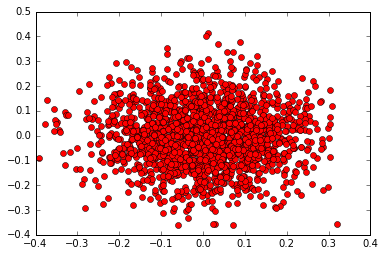

In [12]:
plt.plot(Y_s[:,0], Y_s[:,1], 'ro')
plt.show()

In [8]:
def cca(XA,XB,d):
    XA_c=matrix(XA-average(XA,0))
    XB_c=matrix(XB-average(XB,0))
    sig11=transpose(XA_c)*XA_c
    sig12=transpose(XA_c)*XB_c
    sig22=transpose(XB_c)*XB_c
    sig21=transpose(XB_c)*XA_c
    lambdaA,wA=linalg.eigh(inv(sig11)*sig12*inv(sig22)*sig21)
    ind=argsort(lambdaA)[::-1]
    return XA_c*matrix(wA[:,ind[0:d]])

In [9]:
cca1 = cca(Y,social_evolution,2)

In [10]:
cca1[1][0]

matrix([[ 0.01271196, -0.0126663 ]])

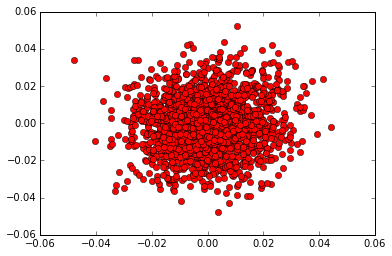

In [11]:
plt.plot(cca1[:,0], cca1[:,1], 'ro')
plt.show()

In [9]:
colors = zeros([1829,1])
colors[80] = 13
colors[452] = 13
colors[1688] = 13
colors[262] = 1
colors[449] = 1
colors[1714] = 1
colors[396] = 2
colors[1032] = 2
colors[1261] = 2
colors[226] = 3
colors[1189] = 3
colors[1200] = 3
colors[501] = 4
colors[1361] = 4
colors[1740] = 4
colors[810] = 5
colors[1412] = 5
colors[1173] = 5
colors[1553] = 6
colors[1576] = 6
colors[1650] = 6
colors[270] = 7
colors[1798] = 7
colors[1800] = 7
colors[1385] = 8
colors[1453] = 8
colors[1686] = 8
colors[598] = 9
colors[670] = 9
colors[684] = 9
colors[900] = 10
colors[926] = 10
colors[1191] = 10
colors[232] = 11
colors[643] = 11
colors[1539] = 11
colors[491] = 12
colors[594] = 12
colors[1168] = 12

In [10]:
points = [80,452,1688,262,449,1714,396,1032,1261,226,1189,1200,501,1361,1740,810,1412,1173,1553,1576,1650,270,1798,1800,1385,1453,1686,598,670,684,900,926,1191,232,643,1539,491,594,1168]
colors = [0,0,0,1,1,1,2,2,2,3,3,3,4,4,4,5,5,5,6,6,6,7,7,7,8,8,8,9,9,9,10,10,10,11,11,11,12,12,12]
Y1 = []
Y2 = []
for i in points:
    Y1.append((cca1[i])[0])
    Y2.append((cca1[i])[1])

IndexError: index 1 is out of bounds for axis 0 with size 1

In [21]:
graph_pcad = numpy.genfromtxt("Y.csv")

In [22]:
graph_pcad

array([ nan,  nan,  nan, ...,  nan,  nan,  nan])

In [59]:
cca1_3dim = cca(social_evolution,X,3)

In [78]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cca1_3dim[:,0], cca1_3dim[:,1], cca1_3dim[:,2])

TypeError: can't multiply sequence by non-int of type 'float'

In [76]:
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()


In [77]:
plt.show()

#KMEANS CLUSTERING

In [12]:
from sklearn import cluster


In [13]:
k_means = cluster.KMeans(n_clusters=13)
Y = k_means.fit_transform(cca1)

In [15]:
import numpy
numpy.set_printoptions(threshold=numpy.nan)

In [18]:
k_means.labels_

array([11,  4,  9,  2, 10,  1,  3,  2,  6, 10,  1, 10, 11,  2,  8,  5,  1,
        7,  2,  7,  1,  1,  0, 11,  0,  8,  6, 11,  7, 10,  2,  6,  1,  4,
       11,  7,  1,  4,  9, 10,  7,  5,  3,  4,  4, 11,  4,  2,  0,  1,  1,
        3, 11,  1,  9, 10, 12, 11,  4,  1,  7,  2,  1,  2, 11,  0, 11, 11,
       12,  0,  4,  9, 10,  6, 11,  7,  1,  1, 11,  7,  7,  0, 10,  5,  5,
        4,  4, 11, 12,  0,  4,  4,  4,  1,  0, 11, 12,  9,  0, 11,  1,  4,
        4,  8,  1,  8,  3, 10,  4,  1,  4,  7, 11,  0, 11,  4,  5,  4,  4,
        4,  7,  7,  7,  6,  3,  3,  4,  7, 11,  4,  6, 11,  5,  7,  5,  5,
        8,  4,  6,  8, 11,  1,  7,  9, 10,  7,  4, 11,  3,  1,  4,  6, 10,
        7,  3,  1,  4,  0,  7,  6,  1,  4, 12, 11,  2,  2, 10,  9,  2,  1,
        4,  7,  3, 10,  2, 10,  5,  6,  4,  5,  4, 10,  4,  0,  8,  0,  6,
        1, 10,  2,  5,  6, 11,  9,  4,  2,  2,  1,  4,  2,  8,  9,  7, 11,
       11, 11, 11, 11,  7, 11,  5,  2,  2,  1,  6, 11,  6,  7,  2,  2,  6,
        3,  4,  7,  7,  4

In [20]:
numpy.savetxt("task2.1.csv", k_means.labels_, fmt='%u', header="index,category", delimiter=",")


#SPECTRAL CLUSTERING